In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and preprocess Data from Schellebelle station in Belgium

### Read raw data 

In [2]:
Schellebelle_pH=pd.read_csv('Schellebelle SF Zeeschelde_pH.csv',delimiter=';',header=7)# water PH

Schellebelle_Watertemperature=pd.read_csv('Schellebelle SF Zeeschelde_Watertemperature.csv',delimiter=';',header=7)# Water Temperature

Schellebelle_Turbidity=pd.read_csv('Schellebelle SF Zeeschelde_Turbidity.csv',delimiter=';',header=7) #Water Turbidity

Schellebelle_Dissolved_Oxygen=pd.read_csv('Schellebelle SF Zeeschelde_Dissolved Oxygen.csv',delimiter=';',header=7)#Water's Disolved Oxygen

Schellebelle_Conductivity=pd.read_csv('Schellebelle SF Zeeschelde_Conductivity.csv',delimiter=';',header=7)#Water conductivity

Schellebelle_Salinity=pd.read_csv('Schellebelle SF Zeeschelde_Salinity.csv',delimiter=';',header=7)#Water Salinity

Schellebelle_Chlorofyl=pd.read_csv('Schellebelle SF Zeeschelde_Chlorofyl.csv',delimiter=';',header=7)#Water Chlorofyl


### Preprocess data 

In [3]:
Schellebelle_pH=Schellebelle_pH.rename(columns={'Value':'PH','#Timestamp':'Date1'})
Schellebelle_pH=Schellebelle_pH.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Watertemperature=Schellebelle_Watertemperature.rename(columns={'Value':'Watertemperature','#Timestamp':'Date2'})
Schellebelle_Watertemperature=Schellebelle_Watertemperature.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Turbidity=Schellebelle_Turbidity.rename(columns={'Value':'Turbidity','#Timestamp':'Date3'})
Schellebelle_Turbidity=Schellebelle_Turbidity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.rename(columns={'Value':'Dissolved Oxygen','#Timestamp':'Date4'})
Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Conductivity=Schellebelle_Conductivity.rename(columns={'Value':'Conductivity','#Timestamp':'Date5'})
Schellebelle_Conductivity=Schellebelle_Conductivity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Salinity=Schellebelle_Salinity.rename(columns={'Value':'Salinity','#Timestamp':'Date6'})
Schellebelle_Salinity=Schellebelle_Salinity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.rename(columns={'Value':'Chlorofyl','#Timestamp':'Date7'})
Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

In [4]:
Schellebelle_pH=Schellebelle_pH.apply(lambda x: x.str.replace(',','.'))# replace ',' with '.' in order to make calculations
Schellebelle_Watertemperature=Schellebelle_Watertemperature.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Salinity=Schellebelle_Salinity.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.apply(lambda x: x.str.replace(',','.'))


Schellebelle_pH['PH']=Schellebelle_pH['PH'].astype(float).round(3)
Schellebelle_Watertemperature['Watertemperature']=Schellebelle_Watertemperature['Watertemperature'].astype(float).round(3)
Schellebelle_Dissolved_Oxygen['Dissolved Oxygen']=Schellebelle_Dissolved_Oxygen['Dissolved Oxygen'].astype(float).round(3)
Schellebelle_Salinity['Salinity']=Schellebelle_Salinity['Salinity'].astype(float).round(3)
Schellebelle_Chlorofyl['Chlorofyl']=Schellebelle_Chlorofyl['Chlorofyl'].astype(float).round(3)


In [5]:
Schellebelle_pH['Date1']=Schellebelle_pH['Date1'].str[:10]
Schellebelle_pH['Date1']=pd.to_datetime(Schellebelle_pH['Date1'])
Schellebelle_pH = Schellebelle_pH.set_index('Date1')
ph=Schellebelle_pH.reset_index().groupby(pd.Grouper(key='Date1', freq='D'))['PH'].mean()#find the mean of multiple loggs per day
ph=ph.reset_index()
ph=ph.rename(columns={'PH':'Mean PH'})

Schellebelle_Watertemperature['Date2']=Schellebelle_Watertemperature['Date2'].str[:10]
Schellebelle_Watertemperature['Date2']=pd.to_datetime(Schellebelle_Watertemperature['Date2'])
Schellebelle_Watertemperature = Schellebelle_Watertemperature.set_index('Date2')
wt=Schellebelle_Watertemperature.reset_index().groupby(pd.Grouper(key='Date2', freq='D'))['Watertemperature'].mean()
wt=wt.reset_index()
wt=wt.rename(columns={'Watertemperature':'Mean Watertemperature'})

Schellebelle_Turbidity['Date3']=Schellebelle_Turbidity['Date3'].str[:10]
Schellebelle_Turbidity['Date3']=pd.to_datetime(Schellebelle_Turbidity['Date3'])
Schellebelle_Turbidity = Schellebelle_Turbidity.set_index('Date3')
tur=Schellebelle_Turbidity.reset_index().groupby(pd.Grouper(key='Date3', freq='D'))['Turbidity'].mean()
tur=tur.reset_index()
tur=tur.rename(columns={'Turbidity':'Mean Turbidity'})

Schellebelle_Dissolved_Oxygen['Date4']=Schellebelle_Dissolved_Oxygen['Date4'].str[:10]
Schellebelle_Dissolved_Oxygen['Date4']=pd.to_datetime(Schellebelle_Dissolved_Oxygen['Date4'])
Schellebelle_Dissolved_Oxygen = Schellebelle_Dissolved_Oxygen.set_index('Date4')
do=Schellebelle_Dissolved_Oxygen.reset_index().groupby(pd.Grouper(key='Date4', freq='D'))['Dissolved Oxygen'].mean()
do=do.reset_index()
do=do.rename(columns={'Dissolved Oxygen':'Mean Dissolved Oxygen'})

Schellebelle_Conductivity['Date5']=Schellebelle_Conductivity['Date5'].str[:10]
Schellebelle_Conductivity['Date5']=pd.to_datetime(Schellebelle_Conductivity['Date5'])
Schellebelle_Conductivity = Schellebelle_Conductivity.set_index('Date5')
con=Schellebelle_Conductivity.reset_index().groupby(pd.Grouper(key='Date5', freq='D'))['Conductivity'].mean()
con=con.reset_index()
con=con.rename(columns={'Conductivity':'Mean Conductivity'})

Schellebelle_Salinity['Date6']=Schellebelle_Salinity['Date6'].str[:10]
Schellebelle_Salinity['Date6']=pd.to_datetime(Schellebelle_Salinity['Date6'])
Schellebelle_Salinity = Schellebelle_Salinity.set_index('Date6')
sal=Schellebelle_Salinity.reset_index().groupby(pd.Grouper(key='Date6', freq='D'))['Salinity'].mean()
sal=sal.reset_index()
sal=sal.rename(columns={'Salinity':'Mean Salinity'})

Schellebelle_Chlorofyl['Date7']=Schellebelle_Chlorofyl['Date7'].str[:10]
Schellebelle_Chlorofyl['Date7']=pd.to_datetime(Schellebelle_Chlorofyl['Date7'])
Schellebelle_Chlorofyl = Schellebelle_Chlorofyl.set_index('Date7')
chlor=Schellebelle_Chlorofyl.reset_index().groupby(pd.Grouper(key='Date7', freq='D'))['Chlorofyl'].mean()
chlor=chlor.reset_index()
chlor=chlor.rename(columns={'Chlorofyl':'Mean Chlorofyl'})

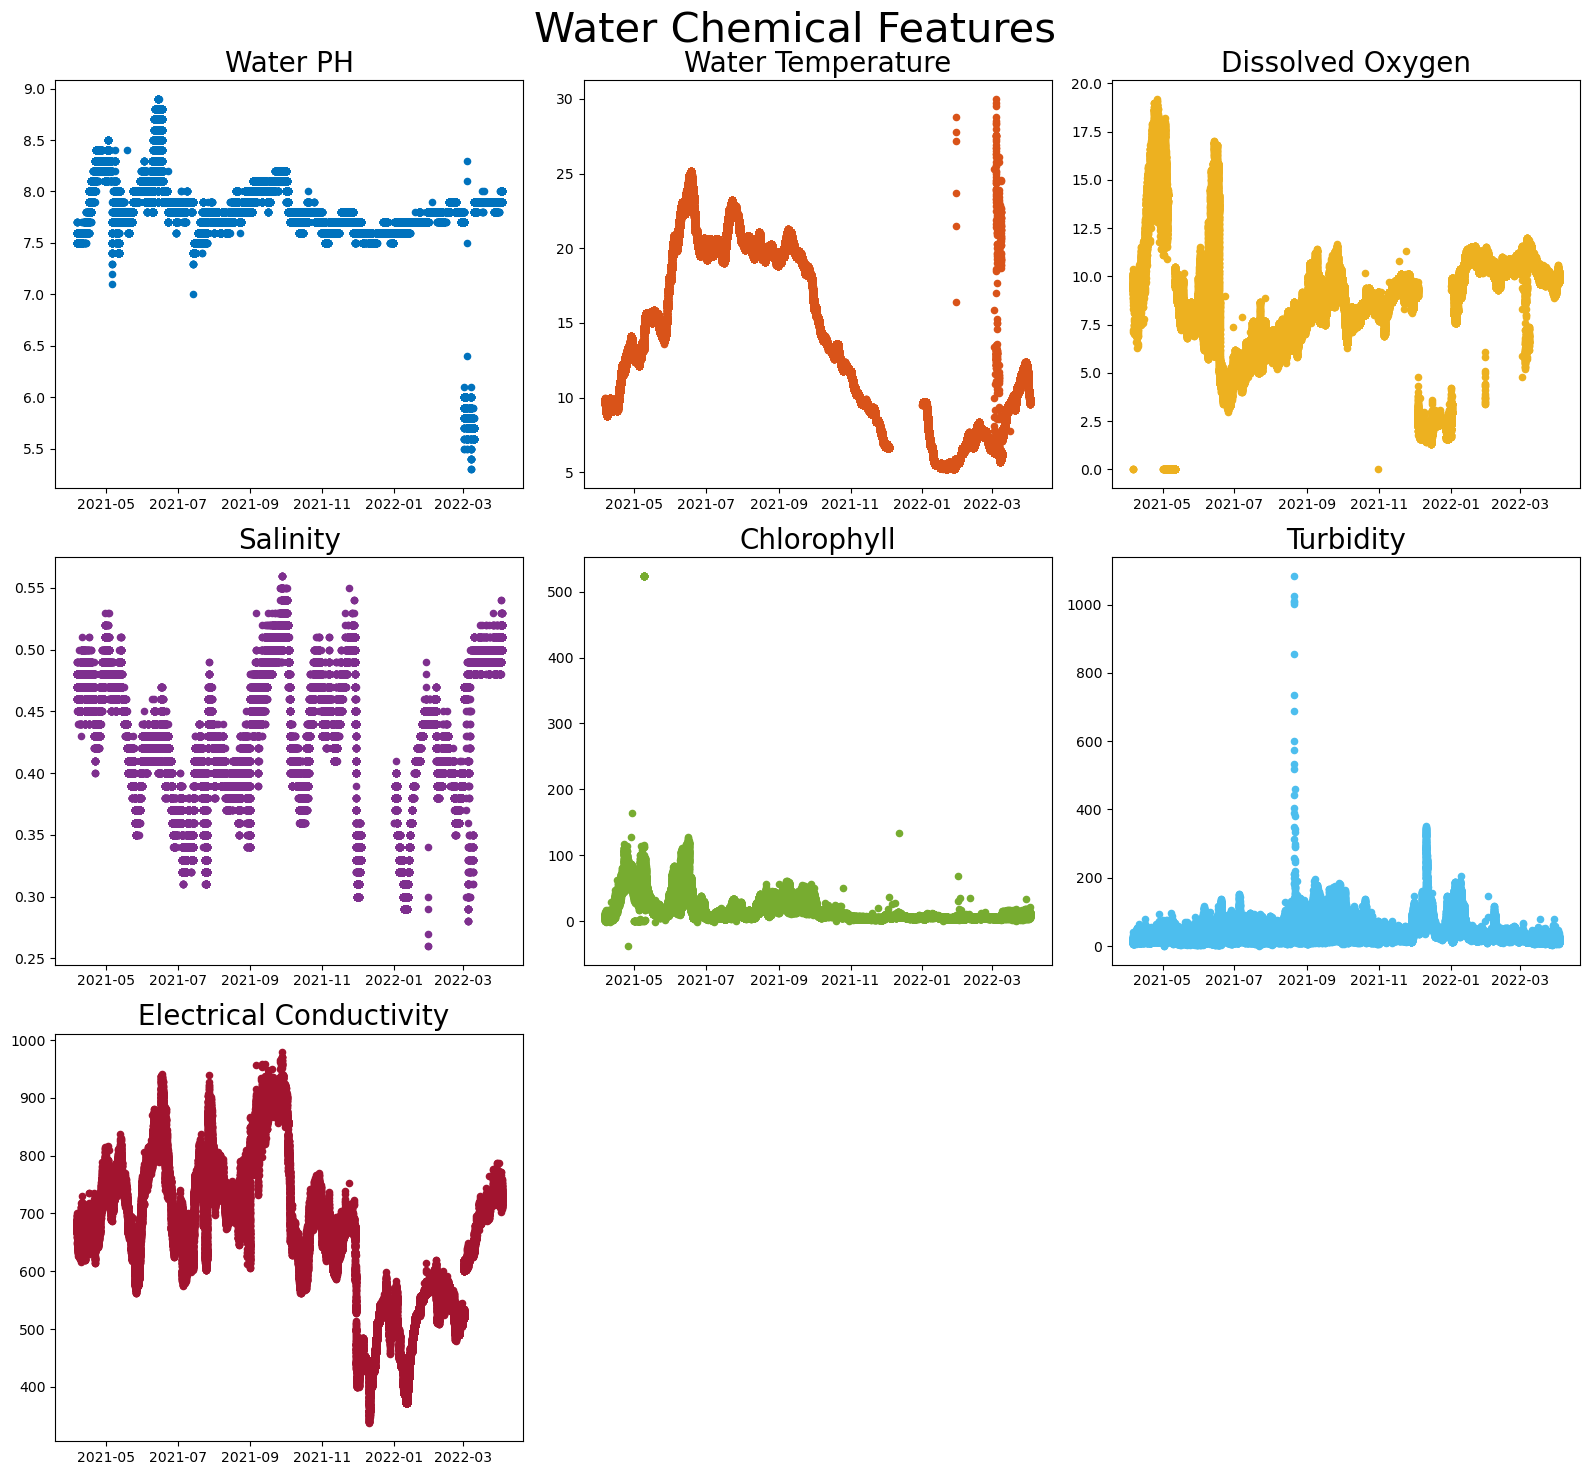

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16,15))

fig.suptitle('Water Chemical Features', fontsize=30)
#plt.scatter(Schellebelle_pH['Datex'],Schellebelle_pH['PH'], annot=True, c='g',ax=axes[0,0])
#plt.scatter(Schellebelle_Watertemperature['Datex'], Schellebelle_Watertemperature['Watertemperature'] , annot=True, c='r',ax=axes[0,1])
#plt.scatter(Schellebelle_Dissolved_Oxygen['Datex'],Schellebelle_Dissolved_Oxygen['Dissolved Oxygen'], annot=True, c='b',ax=axes[0,2])

axes[0,0].scatter(Schellebelle_pH.index,Schellebelle_pH['PH'],s=20,c='#0072BD')
axes[0,0].set_title('Water PH',size=20)
axes[0,1].scatter(Schellebelle_Watertemperature.index, Schellebelle_Watertemperature['Watertemperature'],s=20,c='#D95319')
axes[0,1].set_title('Water Temperature',size=20)
axes[0,2].scatter(Schellebelle_Dissolved_Oxygen.index,Schellebelle_Dissolved_Oxygen['Dissolved Oxygen'],s=20,c='#EDB120')
axes[0,2].set_title('Dissolved Oxygen',size=20)
axes[1,0].scatter(Schellebelle_Salinity.index,Schellebelle_Salinity['Salinity'],s=20,c='#7E2F8E')
axes[1,0].set_title('Salinity',size=20)
axes[1,1].scatter(Schellebelle_Chlorofyl.index, Schellebelle_Chlorofyl['Chlorofyl'],s=20,c='#77AC30')
axes[1,1].set_title('Chlorophyll',size=20)
axes[1,2].scatter(Schellebelle_Turbidity.index,Schellebelle_Turbidity['Turbidity'],s=20,c='#4DBEEE')
axes[1,2].set_title('Turbidity',size=20)
axes[2,0].scatter(Schellebelle_Conductivity.index,Schellebelle_Conductivity['Conductivity'],s=20,c='#A2142F')
axes[2,0].set_title(' Electrical Conductivity',size=20)
#plt.scatter(d[7], annot=True, cmap=plt.cm.Reds,ax=axes[1,2])
#plt.scatter(d[8], annot=True, cmap=plt.cm.Reds,ax=axes[2,0])



fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
#plt.savefig("features_scatterplots.png")
plt.tight_layout()

plt.show()

### Merged seperate features into one using the  Date as the Key 

In [7]:
m1=pd.merge(wt,ph,left_on='Date2',right_on='Date1',how='left')
m2=pd.merge(tur,do,left_on='Date3',right_on='Date4',how='left')
m3=pd.merge(con,sal,left_on='Date5',right_on='Date6',how='left')
temp1=pd.merge(m1,m2,left_on='Date1',right_on='Date3',how='left')
temp2=pd.merge(temp1,m3,left_on='Date1',right_on='Date5',how='left')
final_df=pd.merge(temp2,chlor,left_on='Date1',right_on='Date7',how='left')


In [8]:
final_df=final_df.drop(columns={'Date2','Date3','Date4','Date5','Date6','Date7'})
final_df=final_df.rename(columns={'Date1':'Date'})
final_df=final_df.iloc[:, [1,2,0,3,4,5,6,7]]
final_df=final_df.bfill()

In [9]:
final_df

,Date,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl
0,2021-04-02,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
1,2021-04-03,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
2,2021-04-04,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
3,2021-04-05,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
4,2021-04-06,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
...,...,...,...,...,...,...,...,...
362,2022-03-30,7.852431,12.210069,25.045139,9.350347,754.850694,0.496944,10.620833
363,2022-03-31,7.898611,11.976736,22.815972,9.450347,751.381944,0.497882,10.678819
364,2022-04-01,7.900694,11.142708,19.038194,9.630556,729.250000,0.492986,9.947222
365,2022-04-02,7.923264,10.216319,19.121528,9.921181,727.534722,0.503681,9.950347


## Import Weather Data using meteostat  API

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

In [11]:
start = datetime(2021, 4, 3) #declare the first day from the requested period of time
end = datetime(2022, 4, 3) #declarde the last day from the requested period of time

In [12]:
stations = Stations() #declare station
stations = stations.nearby(51.0115409, 3.917)#longtitude and latitude of Schellebelle
station = stations.fetch(1)

# We are able to fetch the data from Melle's Weather Station, which is the closest to Schellebelle

In [13]:
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
06434,Melle / Kalverhaag,BE,VLG,06434,<NA>,50.9833,3.8167,13.0,Europe/Brussels,2009-10-26,2022-05-29,2009-11-20,2022-03-28,2015-01-01,2020-01-01,7689.537393


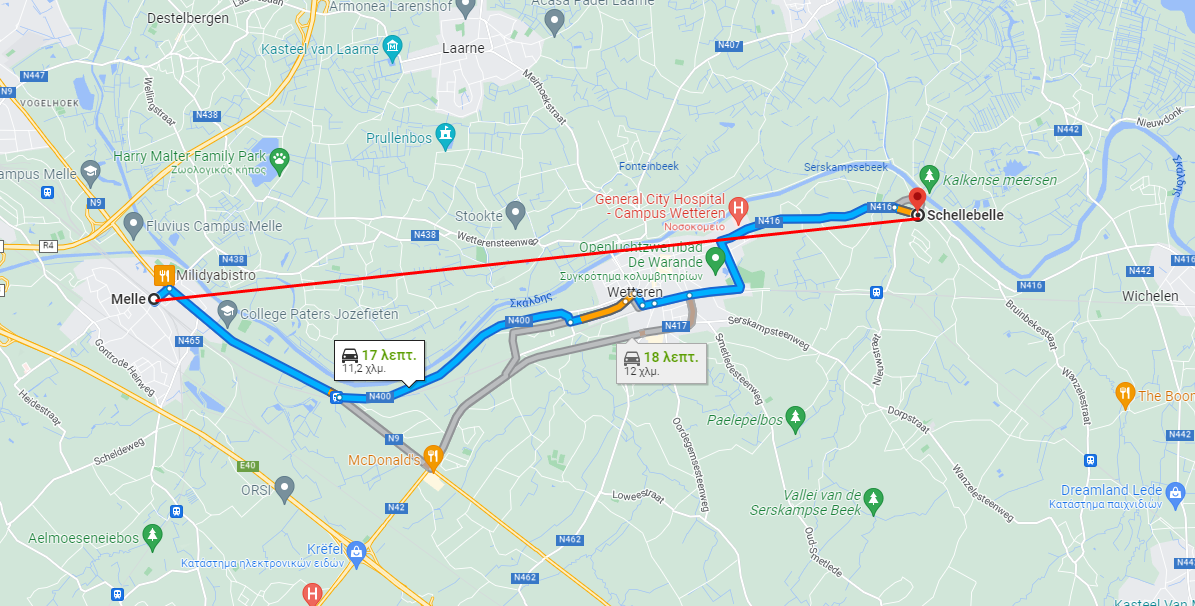

In [14]:
weather_data = Daily(station, start, end)
weather_data = weather_data.fetch()

## Preprocess 

In [15]:
weather_data=weather_data.rename(columns={'time':'Date','tavg':'Average Temperature','tmin':'Min Temperature','tmax':'Max Temperature','prcp':
                                        
                                        'PRCP',"wdir":'Wind Direction','wspd':'Wind Speed','pres':'Pressure'})

In [16]:
weather_data=weather_data.reset_index()
weather_data=weather_data.drop(columns={'snow','wpgt','tsun'})
weather_data=weather_data.rename(columns={'time':'Date'})

# The actual annual weather data for the same period as our water measurements.

In [17]:
weather_data

,Date,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure
0,2021-04-03,7.1,4.7,10.1,0.0,14.0,17.3,1029.1
1,2021-04-04,6.1,4.3,8.7,0.0,344.0,8.0,1026.0
2,2021-04-05,4.4,2.2,7.4,0.9,297.0,20.4,1015.3
3,2021-04-06,1.9,0.3,5.5,5.2,309.0,17.4,1017.4
4,2021-04-07,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0
...,...,...,...,...,...,...,...,...
360,2022-03-30,9.3,7.2,12.5,1.0,55.0,10.4,1005.1
361,2022-03-31,5.1,2.6,7.6,3.2,358.0,19.4,1001.9
362,2022-04-01,2.1,0.1,3.8,5.5,35.0,21.6,1008.9
363,2022-04-02,3.7,1.2,6.3,0.0,30.0,18.2,1019.2


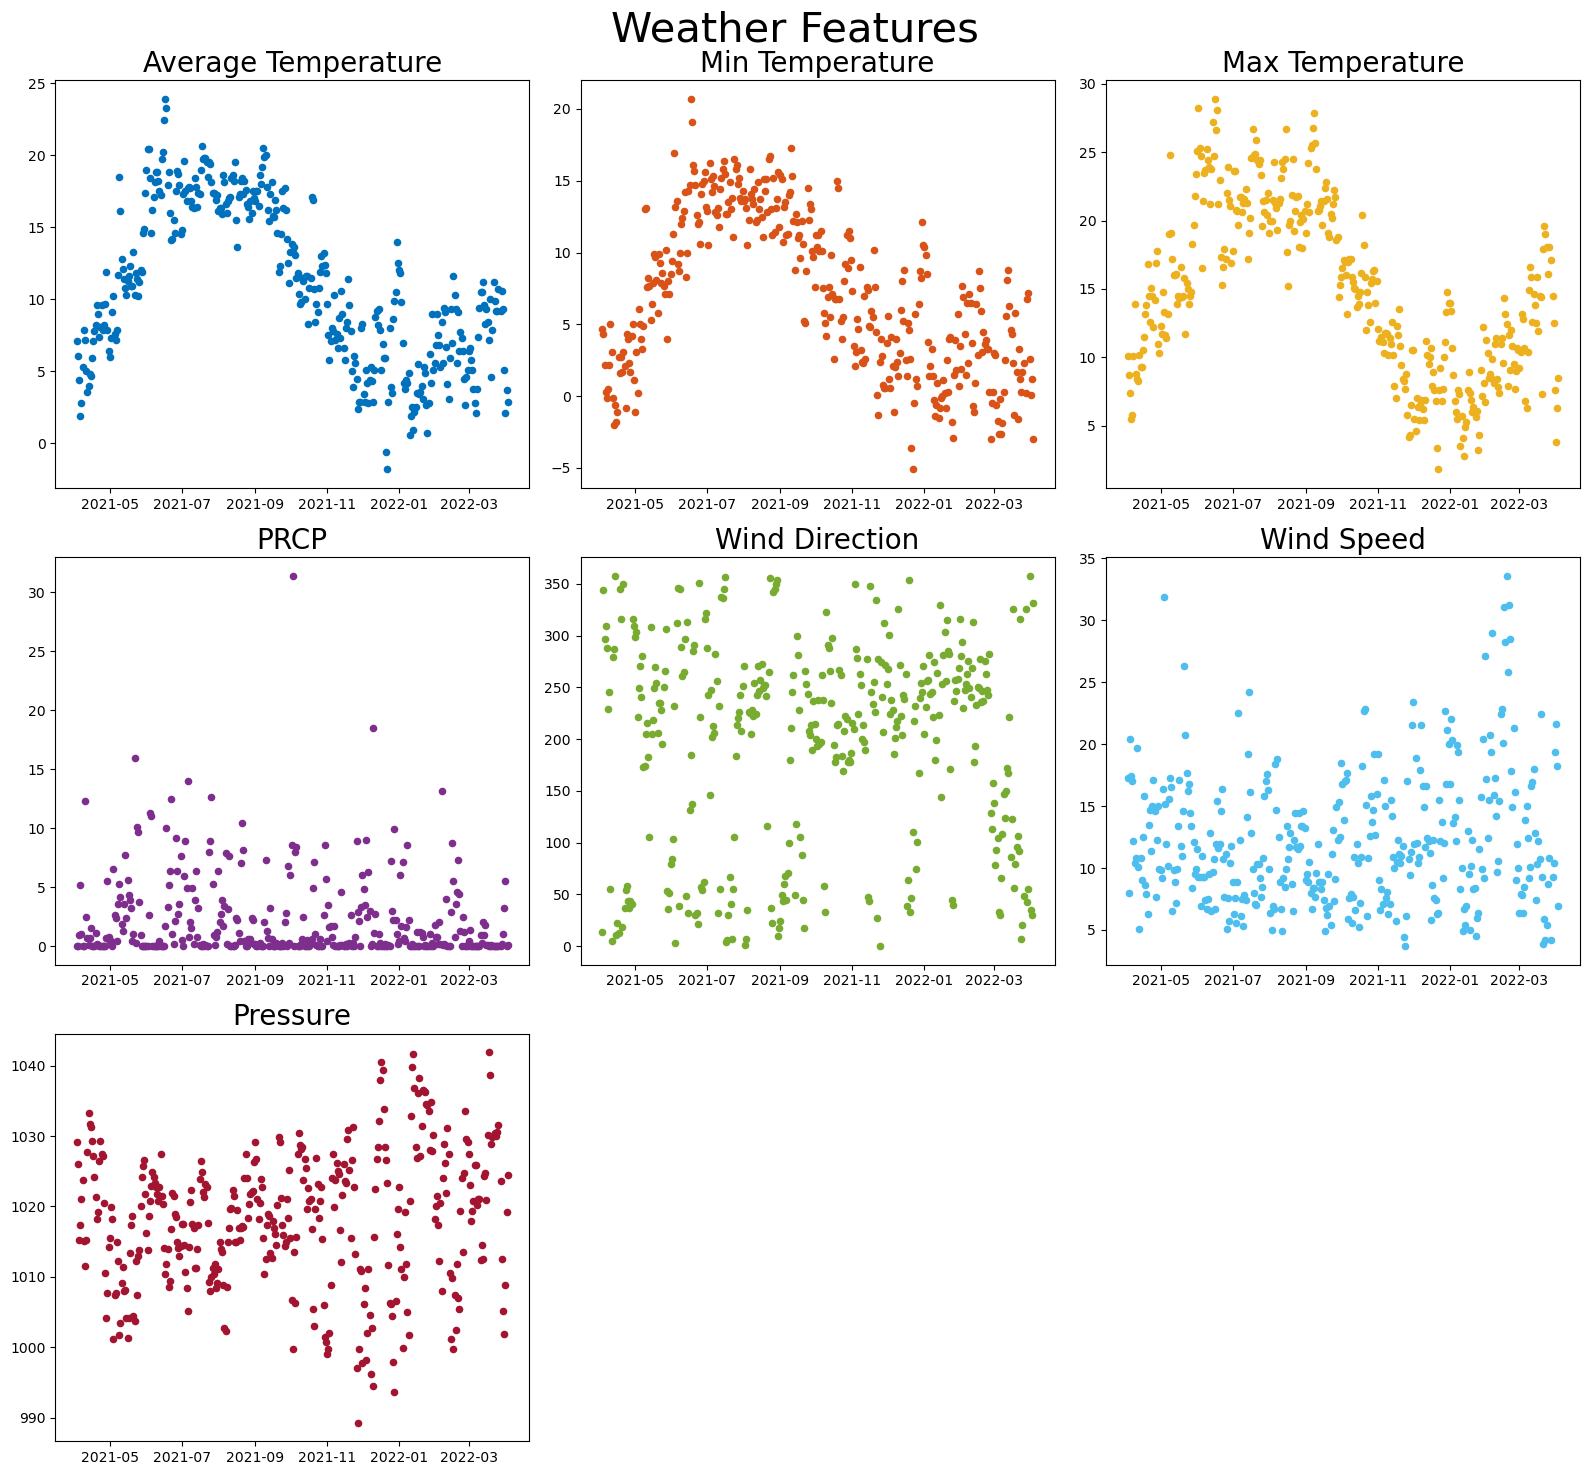

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16,15))

fig.suptitle('Weather Features', fontsize=30)
#plt.scatter(Schellebelle_pH['Datex'],Schellebelle_pH['PH'], annot=True, c='g',ax=axes[0,0])
#plt.scatter(Schellebelle_Watertemperature['Datex'], Schellebelle_Watertemperature['Watertemperature'] , annot=True, c='r',ax=axes[0,1])
#plt.scatter(Schellebelle_Dissolved_Oxygen['Datex'],Schellebelle_Dissolved_Oxygen['Dissolved Oxygen'], annot=True, c='b',ax=axes[0,2])

axes[0,0].scatter(weather_data['Date'],weather_data['Average Temperature'],s=20,c='#0072BD')
axes[0,0].set_title('Average Temperature',size=20)
axes[0,1].scatter(weather_data['Date'], weather_data['Min Temperature'],s=20,c='#D95319')
axes[0,1].set_title('Min Temperature',size=20)
axes[0,2].scatter(weather_data['Date'],weather_data['Max Temperature'],s=20,c='#EDB120')
axes[0,2].set_title('Max Temperature',size=20)
axes[1,0].scatter(weather_data['Date'],weather_data['PRCP'],s=20,c='#7E2F8E')
axes[1,0].set_title('PRCP',size=20)
axes[1,1].scatter(weather_data['Date'], weather_data['Wind Direction'],s=20,c='#77AC30')
axes[1,1].set_title('Wind Direction',size=20)
axes[1,2].scatter(weather_data['Date'],weather_data['Wind Speed'],s=20,c='#4DBEEE')
axes[1,2].set_title('Wind Speed',size=20)
axes[2,0].scatter(weather_data['Date'],weather_data['Pressure'],s=20,c='#A2142F')
axes[2,0].set_title('Pressure',size=20)
#plt.scatter(d[7], annot=True, cmap=plt.cm.Reds,ax=axes[1,2])
#plt.scatter(d[8], annot=True, cmap=plt.cm.Reds,ax=axes[2,0])



fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
#plt.savefig("wather_features_scatterplots.png")
plt.tight_layout()

plt.show()

In [19]:
#weather_data=pd.read_excel('Weather_data_from_Melle_Station.xlsx', header=0)  

## Merging Water Features Dataframe with Weather Dataframe  based on the same date

In [20]:
df=pd.merge(final_df,weather_data,left_on=['Date'],right_on=['Date'],how='left')

In [21]:
df=df.loc[1:]

In [22]:
df=df.fillna(method="ffill")

In [23]:
df.head()

,Date,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure
1,2021-04-03,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,7.1,4.7,10.1,0.0,14.0,17.3,1029.1
2,2021-04-04,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,6.1,4.3,8.7,0.0,344.0,8.0,1026.0
3,2021-04-05,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,4.4,2.2,7.4,0.9,297.0,20.4,1015.3
4,2021-04-06,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,1.9,0.3,5.5,5.2,309.0,17.4,1017.4
5,2021-04-07,7.570139,9.214583,15.697917,9.526389,653.989583,0.464062,6.435069,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0


## Basic Statistical info for the final dataframe 

In [24]:
df.describe()

,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.769645,13.509840,43.858853,8.302810,668.553500,0.424500,16.947462,10.982787,7.110929,14.851093,2.108197,194.830601,12.212842,1018.226776
std,0.348900,5.524325,24.374135,3.038463,120.637348,0.051879,17.605427,5.503085,5.487779,6.201218,3.493107,100.201188,5.348140,9.666558
min,5.682986,5.218750,13.173913,0.000000,381.715278,0.293333,3.419792,-1.800000,-5.100000,1.800000,0.000000,0.000000,3.700000,989.300000
25%,7.682118,9.407639,27.641493,6.935330,583.256076,0.387891,5.630035,6.600000,2.500000,10.025000,0.000000,105.000000,8.300000,1011.800000
50%,7.776389,12.255382,36.770833,8.782812,681.326389,0.420781,8.964274,10.350000,6.850000,14.500000,0.400000,223.500000,11.000000,1018.900000
75%,7.900000,19.624045,51.878472,10.021939,742.961806,0.468672,23.817708,16.400000,12.100000,20.200000,2.700000,266.000000,15.400000,1024.850000
max,8.629514,24.728819,214.187500,16.809722,901.343750,0.527153,98.162500,23.900000,20.700000,28.900000,31.400000,358.000000,33.600000,1041.900000


## Including the Variance per feature 

In [25]:
df.var()

Mean PH                      0.121731
Mean Watertemperature       30.518167
Mean Turbidity             594.098450
Mean Dissolved Oxygen        9.232258
Mean Conductivity        14553.369797
Mean Salinity                0.002691
Mean Chlorofyl             309.951074
Average Temperature         30.283949
Min Temperature             30.115716
Max Temperature             38.455108
PRCP                        12.201796
Wind Direction           10040.278075
Wind Speed                  28.602602
Pressure                    93.442350
dtype: float64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# USING PEARSON'S CORRELATION

### A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
### A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
### Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related. 

# 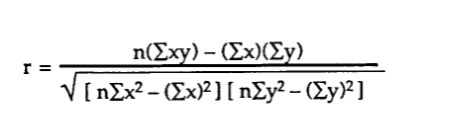

## Display Using a Heatmap 

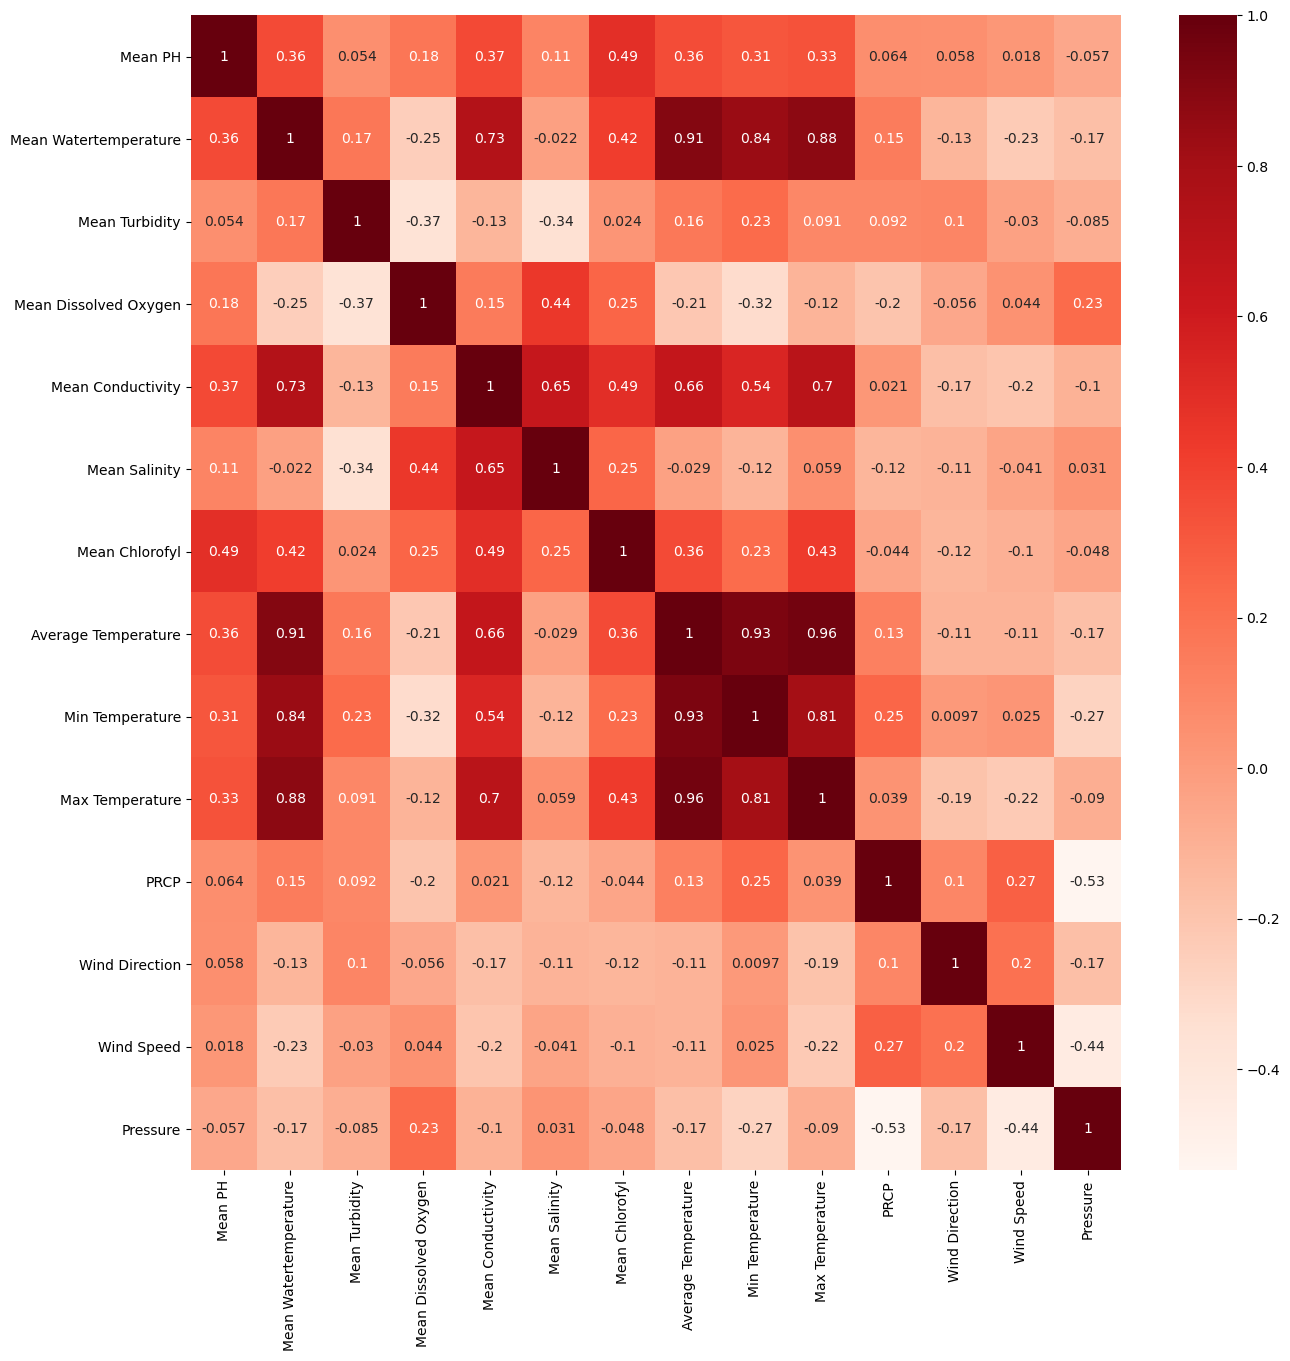

In [27]:

plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("pearson_corr.png")
plt.show()

## Isolate Conductivity for better View 

In [28]:
only_conductivity=corr.iloc[[4]]
only_conductivity=only_conductivity.T
only_conductivity=only_conductivity.rename(columns={'Mean Conductivity':'Pearson Correlation with Mean Conductivity'})
only_conductivity=only_conductivity.sort_values(by='Pearson Correlation with Mean Conductivity',ascending=False)
only_conductivity=only_conductivity.drop('Mean Conductivity')

### The correlations between Conductivity and the rest of the features in descending order. 

In [29]:
only_conductivity

,Pearson Correlation with Mean Conductivity
Mean Watertemperature,0.734060
Max Temperature,0.700848
Average Temperature,0.656415
Mean Salinity,0.645287
Min Temperature,0.544066
Mean Chlorofyl,0.493334
Mean PH,0.369380
Mean Dissolved Oxygen,0.149492
PRCP,0.021385
Pressure,-0.104156


### Display with a Bar plot 

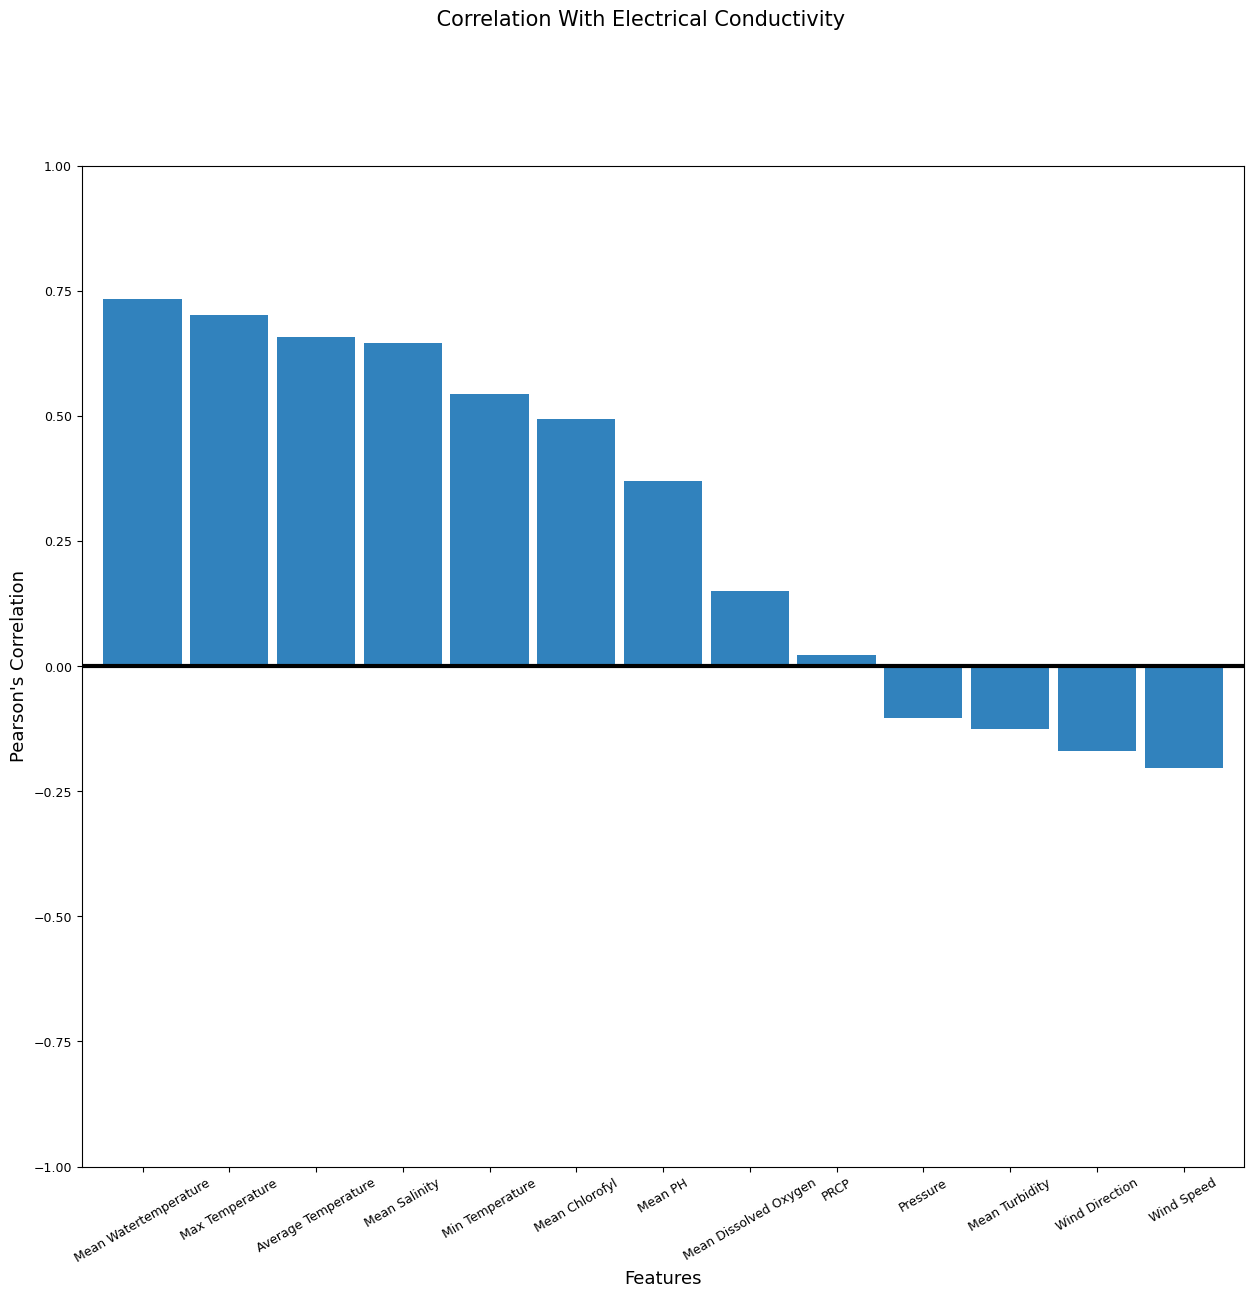

In [30]:
only_conductivity.plot.bar(colormap='tab20c', figsize=(15,13), fontsize=9, width=0.9, legend=False, rot=30,)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' Correlation With Electrical Conductivity  ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=13)
plt.ylabel(r"Pearson's Correlation", fontsize=13)
plt.axhline(y=0.0, color='black', linestyle='-', linewidth=3)
plt.ylim([-1, 1])
plt.savefig('ec_corr_histogram.png')
plt.show()

In [31]:
df=df.set_index('Date')

In [32]:
conductivity_with_temp_and_sal_chlor=df[['Average Temperature','Mean Watertemperature','Mean Salinity','Mean Conductivity','Mean Chlorofyl']]

### Display top four positive correlated features with Mean Condicity 

### When it comes to the weather's Temperatures (Average ,Min,Max), since theay highly correlated with each other it is safe to keep on of them ,aiming for feature redution. I chose Average Temperature. 

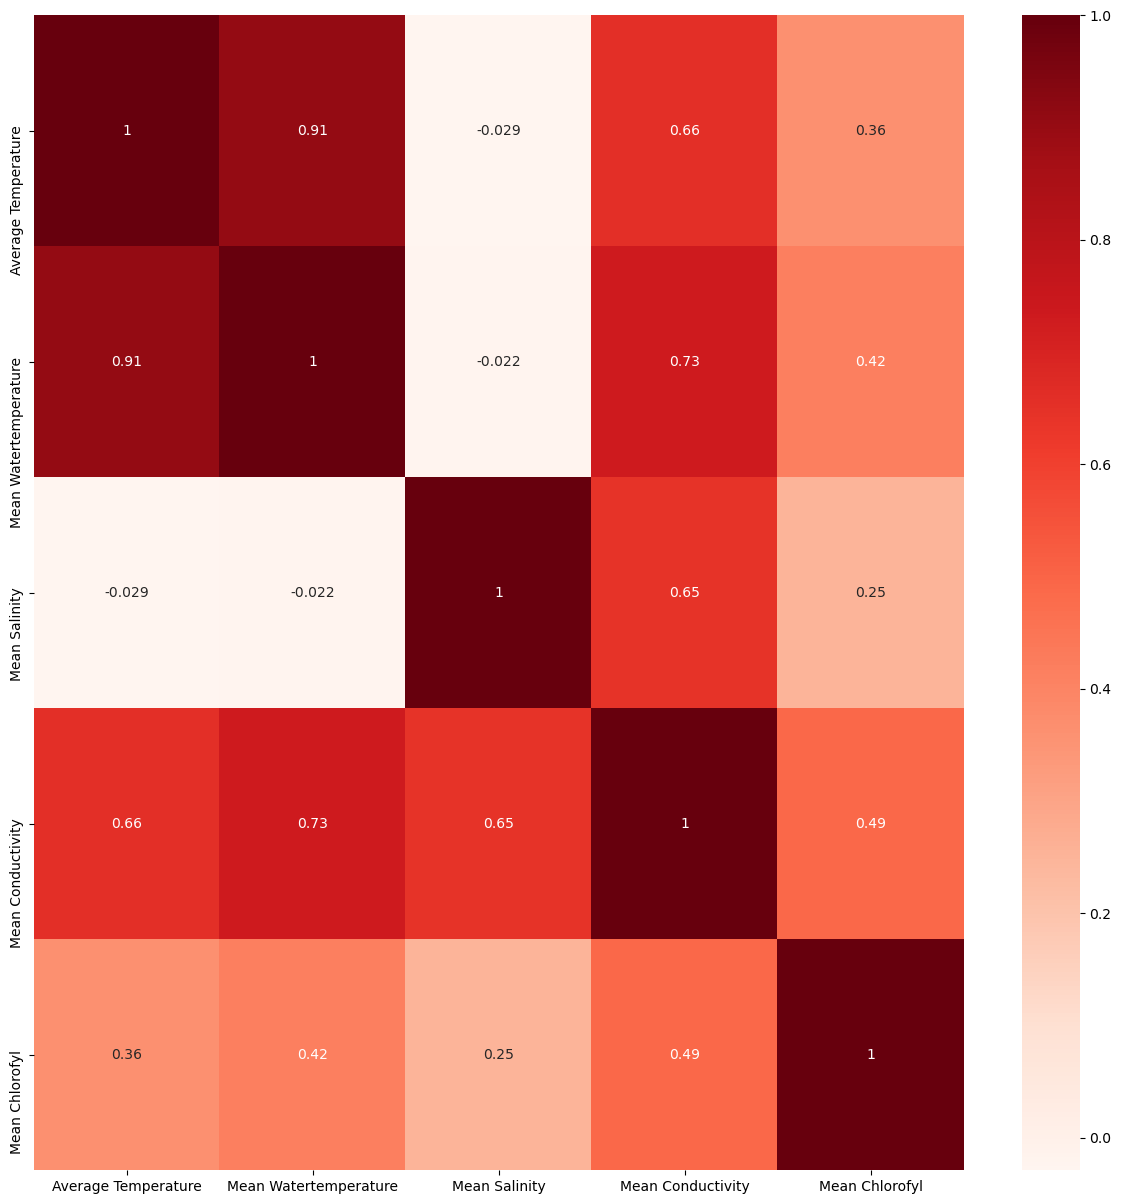

In [33]:
plt.figure(figsize=(15,15))
conductivity_with_temp_and_sal_chlor_corr = conductivity_with_temp_and_sal_chlor.corr()
sns.heatmap(conductivity_with_temp_and_sal_chlor_corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("pearson_corr_top_four.png")
plt.show()

### Display with a line plot to notice  if they have tha same trend or seasonality 

### It is clear that the Average Temperature, the Mean Water Temperature and the Mean Conductivity have similar plots proving their high correlation

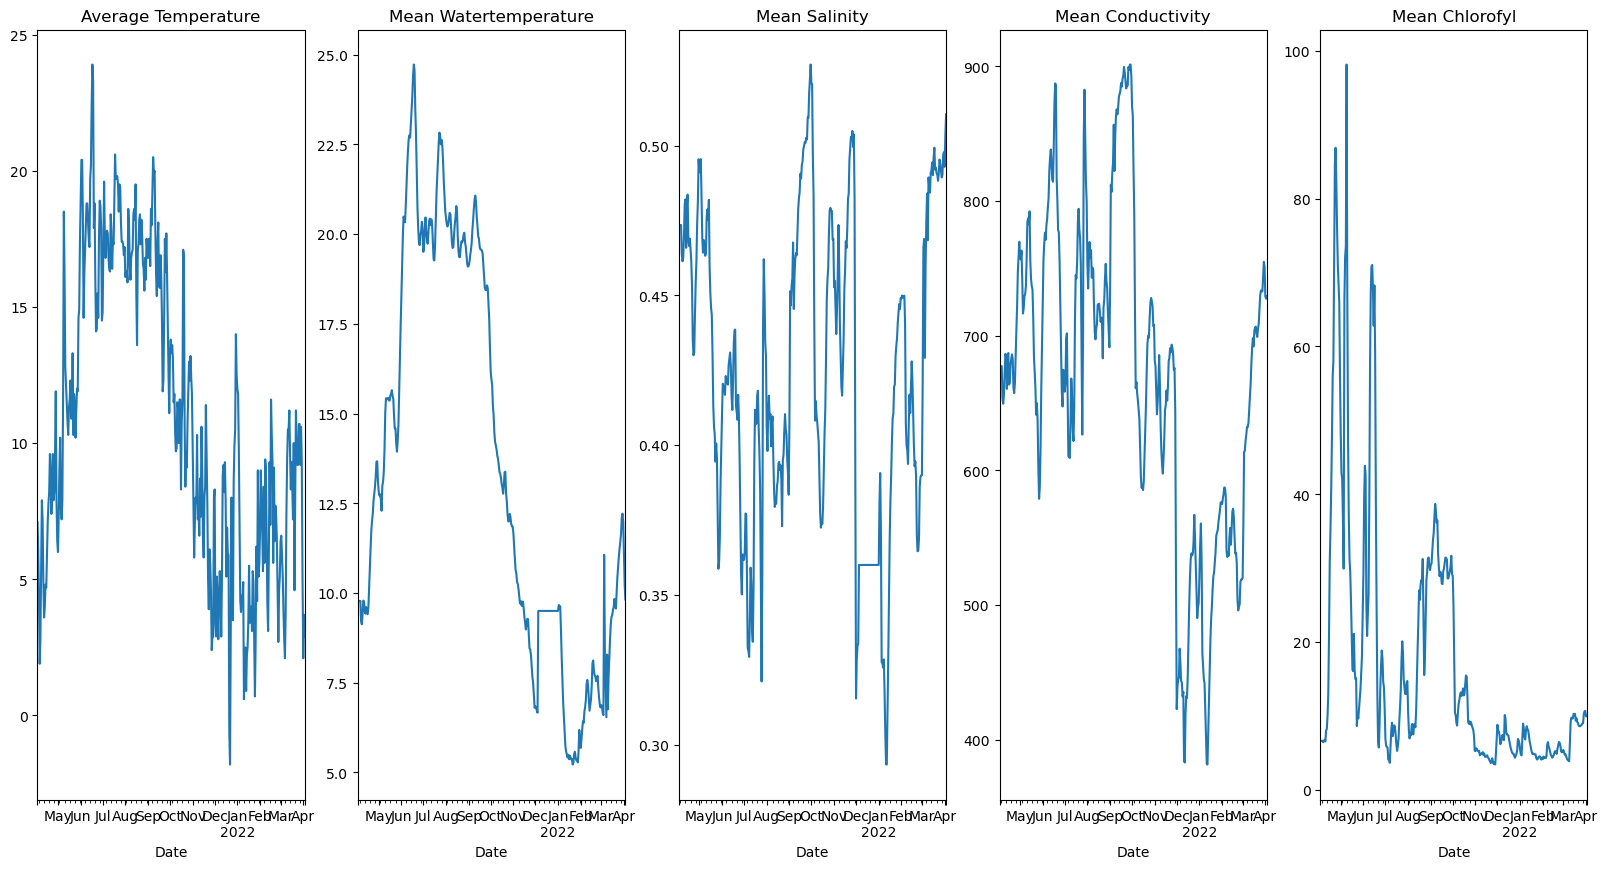

In [34]:
fig, axes = plt.subplots(1, 5,figsize=(20,10))
conductivity_with_temp_and_sal_chlor['Average Temperature'].plot(ax=axes[0],title='Average Temperature')
conductivity_with_temp_and_sal_chlor['Mean Watertemperature'].plot(ax=axes[1],title='Mean Watertemperature')
conductivity_with_temp_and_sal_chlor['Mean Salinity'].plot(ax=axes[2],title='Mean Salinity')
conductivity_with_temp_and_sal_chlor['Mean Conductivity'].plot(ax=axes[3],title='Mean Conductivity')
conductivity_with_temp_and_sal_chlor['Mean Chlorofyl'].plot(ax=axes[4],title='Mean Chlorofyl')
plt.savefig("top_four_linplots.png")
plt.show()

# Calculating the p-value in order to reject the null hypothesis

### When you perform a statistical test a p-value helps you determine the significance of your results in relation to the null hypothesis. Or in our case that the correlation of the features, calculated by the Pearsons correlation formula are not due to random causes meaning that there is no relationship between two measured phenomena. The smaller the p-value the stronger the evidence against the null hypothesis 

## Null hypothesis rejected and we are good to continue

In [35]:
from scipy import stats
corr_pval=pd.DataFrame(columns=['corr','p'])# r is pearson's correlation 
df2=conductivity_with_temp_and_sal_chlor
for col in df2:
    
    corr, p=stats.pearsonr(df2['Mean Conductivity'],df2[col])
    corr_pval.loc[col]=[round(corr,3),round(p,3)]
corr_pval

,corr,p
Average Temperature,0.656,0.0
Mean Watertemperature,0.734,0.0
Mean Salinity,0.645,0.0
Mean Conductivity,1.000,0.0
Mean Chlorofyl,0.493,0.0


## Using Mutual Information to help us select the best features for predicting Mean Conductivity 

# In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (Entropy=Expected value of the surprise) obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable. 

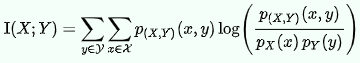

In [36]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
df=df.reset_index(drop=False)

In [38]:
df

,Date,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure
0,2021-04-03,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,7.1,4.7,10.1,0.0,14.0,17.3,1029.1
1,2021-04-04,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,6.1,4.3,8.7,0.0,344.0,8.0,1026.0
2,2021-04-05,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,4.4,2.2,7.4,0.9,297.0,20.4,1015.3
3,2021-04-06,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758,1.9,0.3,5.5,5.2,309.0,17.4,1017.4
4,2021-04-07,7.570139,9.214583,15.697917,9.526389,653.989583,0.464062,6.435069,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-03-30,7.852431,12.210069,25.045139,9.350347,754.850694,0.496944,10.620833,9.3,7.2,12.5,1.0,55.0,10.4,1005.1
362,2022-03-31,7.898611,11.976736,22.815972,9.450347,751.381944,0.497882,10.678819,5.1,2.6,7.6,3.2,358.0,19.4,1001.9
363,2022-04-01,7.900694,11.142708,19.038194,9.630556,729.250000,0.492986,9.947222,2.1,0.1,3.8,5.5,35.0,21.6,1008.9
364,2022-04-02,7.923264,10.216319,19.121528,9.921181,727.534722,0.503681,9.950347,3.7,1.2,6.3,0.0,30.0,18.2,1019.2


In [39]:
X=df.drop(columns={'Mean Conductivity','Date'})
y=df['Mean Conductivity']

In [40]:
xtr,xtest,ytr,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
mi=mutual_info_regression(xtr,ytr)
mi=pd.Series(mi)
mi.index=xtr.columns
mi.sort_values(ascending=False,inplace=True)

## Display MI Score per feature using a bar plot 

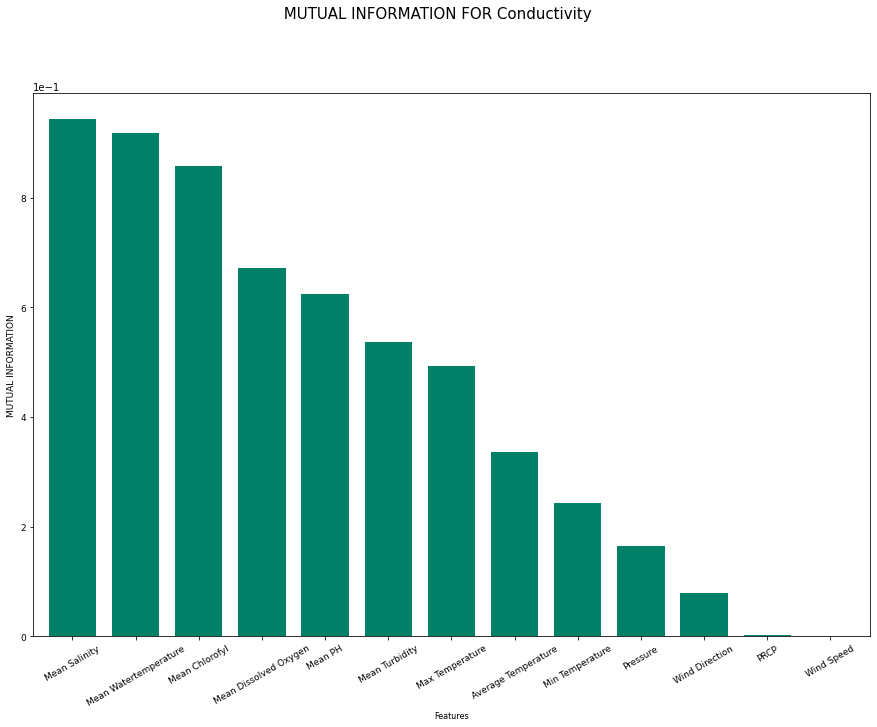

In [42]:
mi.plot.bar(colormap='summer', figsize=(15,10), fontsize=9, width=0.75, legend=False, rot=30,)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' MUTUAL INFORMATION FOR Conductivity ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=8)
plt.ylabel(r'MUTUAL INFORMATION', fontsize=9)
plt.savefig('mutual_info_histo.png')
plt.show()

In [43]:
from sklearn.feature_selection import SelectKBest

# Using K-Best to select us the top 5 features bases on the Mutual Information with Mean Conductivity

### As we can see, the results of top 5 best features are somewhere different from the Perason's Correlations.
### But this is Ok. This Mutual Information shows us the mutual information (entropy) that the features have with mean conductivity, not indicating if its positive or negative. 
### For example mean Chlorofyl  have a large MI Score, but when we view the correlation we see that firstly it is positive but the correlation is not super high.

### We should take both measurements in consideration in order to choose the final features for our dataframe. 

In [44]:
kbest=SelectKBest(mutual_info_regression,k=5).fit(xtr,ytr)
dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','MI Score']
featureScores=featureScores.sort_values(by=['MI Score'],ascending=False)
featureScores

,Features,MI Score
4,Mean Salinity,0.940994
1,Mean Watertemperature,0.919460
5,Mean Chlorofyl,0.857600
3,Mean Dissolved Oxygen,0.671964
0,Mean PH,0.626798
2,Mean Turbidity,0.536175
8,Max Temperature,0.490238
6,Average Temperature,0.335393
7,Min Temperature,0.240650
12,Pressure,0.164830


# Using Both Measurements, the final dataframe that will be used in the NN in order to make predictions for Mean Conductivity is... 

In [45]:
conductivity_with_temp_and_sal_chlor.head()

,Average Temperature,Mean Watertemperature,Mean Salinity,Mean Conductivity,Mean Chlorofyl
Date,,,,,
2021-04-03,7.1,9.778000,0.473533,677.460000,6.628758
2021-04-04,6.1,9.778000,0.473533,677.460000,6.628758
2021-04-05,4.4,9.778000,0.473533,677.460000,6.628758
2021-04-06,1.9,9.778000,0.473533,677.460000,6.628758
2021-04-07,2.8,9.214583,0.464062,653.989583,6.435069


In [46]:
#conductivity_with_temp_and_sal_chlor.to_excel('final_df.xlsx',header=True,index=True)

## Let's exam only the mean Conductivity 

In [47]:
df=df.set_index('Date')

In [48]:
y=df[['Mean Conductivity']]

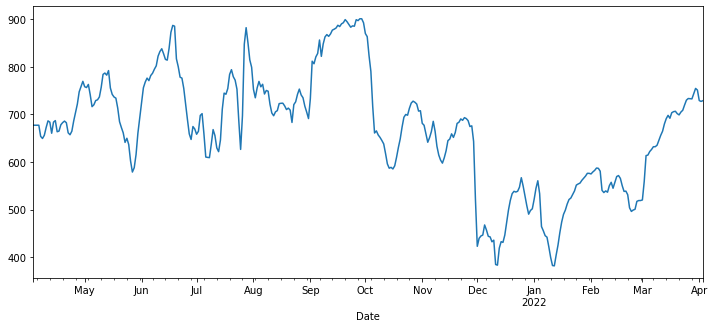

In [49]:
y['Mean Conductivity'].plot(figsize=(12,5))
plt.savefig('ec.png')

## Mean Conductivity seems to be affected by seasonality. Fact that it makes sense, since it is high correlated with temperature, a known seasonal feature.

## Lets Test it 

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

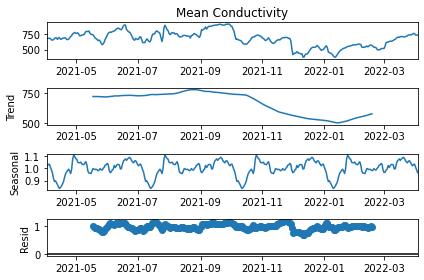

In [51]:
decompose_result = seasonal_decompose(y['Mean Conductivity'], model="multiplicative", period=90)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();
plt.savefig('ec_seasonality_dec.png')

### Mean Conductivity's Sesonality 

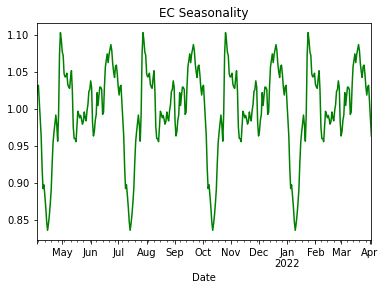

In [52]:
seasonality=decompose_result.seasonal
seasonality.plot(color='green')
plt.title('EC Seasonality')
plt.savefig('EC_seasonality.png')

# Let's Run an Adfuller Test, in order to be sure, by the p-value, that this feature is not stationary, proving it is indeed seasonal.  

# 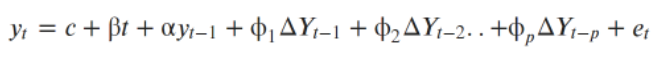

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mean_conductivity):
    result=adfuller(mean_conductivity)
    labels = ['ADF Test Statistic','p-value','#Lags Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [55]:
test_result=adfuller_test(y['Mean Conductivity'])

ADF Test Statistic : -2.284870508977382
p-value : 0.17689397115946603
#Lags Used : 2
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Mean Conductivity it is indeed non-stationary 

### Lets try to remove (smooth)seasonality , by using moving averages method.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


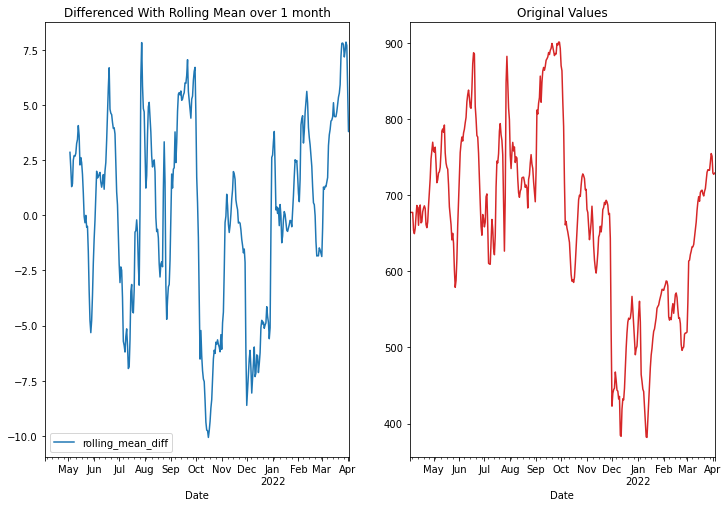

In [56]:
rolling_mean = y.rolling(window = 30).mean()
y['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()


ax1 = plt.subplot(121)
y['rolling_mean_diff'].plot(figsize=(12,8),color="tab:blue", title="Differenced With Rolling Mean over 1 month", ax=ax1,legend=True);
ax2 = plt.subplot(122)
y['Mean Conductivity'].plot(figsize=(12,8), color="tab:red", title="Original Values", ax=ax2);
plt.savefig('moving_averages')

In [57]:
## Again test dickey fuller test
adfuller_test(y['rolling_mean_diff'].dropna())

ADF Test Statistic : -3.7010608553921784
p-value : 0.004098256978963861
#Lags Used : 7
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Now seasonality has been removed to a point where the feature is stationary.

# Use auto.arima with the stationary feature to recommend us the best p,d,q values.

In [58]:
import statsmodels.api as sm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [59]:
select_arima=auto_arima(y['rolling_mean_diff'].dropna(),trace=True,suppress_warnings=True)
select_arima.summary()#minimize AIC

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=904.142, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1933.732, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1004.820, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1535.941, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1931.740, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=906.255, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=910.796, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=899.994, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=908.409, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=898.926, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=910.271, Time=0.22 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=900.891, Time=0.48 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=900.906, Time=0.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=899.864, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  336
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -441.493
Date:                Wed, 13 Jul 2022   AIC                            896.986
Time:                        20:17:48   BIC                            923.705
Sample:                             0   HQIC                           907.637
                                - 336                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9597      0.170      5.660      0.000       0.627       1.292
ar.L2         -0.5709      0.261     -2.188      0.029      -1.082      -0.059
ar.L3          0.7301      0.198      3.686      0.000       0.342       1.118
ar.L4         -0.2052      0.092     -2.239      0.025      -0.385      -0.026
ma.L1          0.5957      0.168      3.552      0.000       0.267       0.924
ma.L2          0.6643      0.104      6.373      0.000       0.460       0.869
sigma2         0.8017      0.043     18.704      0.000       0.718       0.886
===================================================================================
Ljung-Box (Q):                      108.89   Jarque-Bera (JB):               140.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.29
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Lets Try ARIMA(4,0,2) 

In [60]:
#split to train and testing
train=y['rolling_mean_diff'].iloc[:-150] #
test=y['rolling_mean_diff'].iloc[-150: ]

In [61]:
train

Date
2021-04-03         NaN
2021-04-04         NaN
2021-04-05         NaN
2021-04-06         NaN
2021-04-07         NaN
                ...   
2021-10-31   -5.411769
2021-11-01   -6.076157
2021-11-02   -4.875579
2021-11-03   -4.386343
2021-11-04   -2.518403
Name: rolling_mean_diff, Length: 216, dtype: float64

In [62]:
from statsmodels.tsa.arima_model import ARIMA

## Train the model 

In [63]:
#train the model
model_arima=ARIMA(train.dropna(),order=(4,0,2))
model_fit=model_arima.fit()

In [64]:
train.isna().sum()

30

## Make predictions for the testing season and evaluate

In [65]:
index_future_dates=pd.date_range(start='2021-11-04',end='2022-04-02')
pred=model_fit.predict(start=len(train)-30,end=len(train)+119,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2021-11-04   -2.005402
2021-11-05   -1.727187
2021-11-06   -1.660288
2021-11-07   -1.575628
2021-11-08   -1.438166
                ...   
2022-03-29   -0.096678
2022-03-30   -0.096673
2022-03-31   -0.096669
2022-04-01   -0.096666
2022-04-02   -0.096662
Freq: D, Name: ARIMA Predictions, Length: 150, dtype: float64


In [66]:
target_smoothed=pd.DataFrame({'Date':test.index,'Target Smoothed':test.values})
target_smoothed=target_smoothed.set_index('Date')
predicted_arima=pd.DataFrame({'Date':pred.index,'Predicted ARIMA':pred.values})
predicted_arima=predicted_arima.set_index('Date')

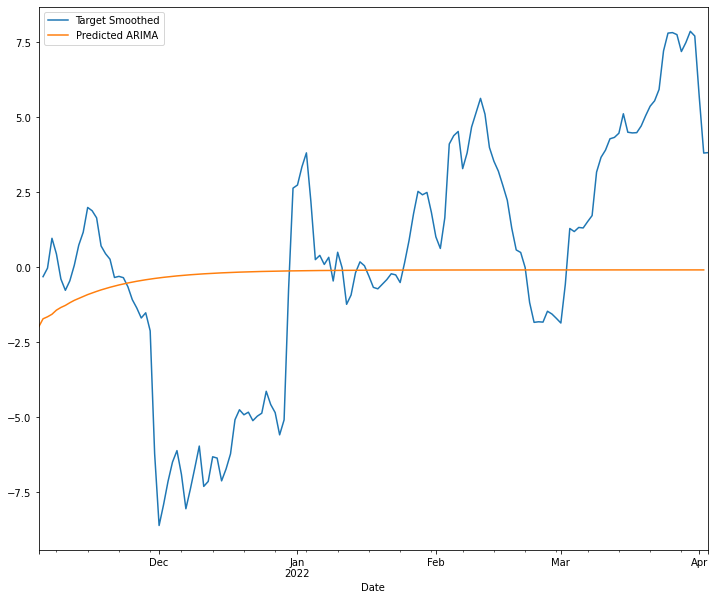

In [67]:
target_vs_predicted_arima=pd.concat([target_smoothed,predicted_arima],axis=1)
target_vs_predicted_arima.plot(legend=True,figsize=(12,10))
plt.savefig('arima1.png')

## The model performs poorly
### This is due to the fact that maybe this specific ARIMA model it is not suitable for this feature. 
### Also as the feature has been smoothed, the predictions are not true to reality.

# Lets approach using SARIMAX, An ARIMA model that takes in account the Seasonality 

## We do not have to remove the seasonality. We will use the initial feature,Mean Conductivity. 

# We will use auto arima again to compensate for my lack of statistical knowledge and recommend us the best combination.

In [68]:
select_arima=auto_arima(y['Mean Conductivity'],trace=True,suppress_warnings=True)
select_arima.summary()#minimize AIC

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3210.050, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3316.634, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3230.577, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3213.712, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3314.648, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3209.817, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3209.615, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3208.578, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3210.242, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3210.133, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3211.914, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3206.585, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3207.621, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3208.250, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1599.292
Date:                Wed, 13 Jul 2022   AIC                           3206.585
Time:                        20:17:51   BIC                           3222.185
Sample:                             0   HQIC                          3212.784
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5869      0.032     18.082      0.000       0.523       0.651
ma.L2          0.0874      0.041      2.156      0.031       0.008       0.167
ma.L3         -0.0911      0.043     -2.100      0.036      -0.176      -0.006
sigma2       374.0158     17.214     21.727      0.000     340.277     407.755
===================================================================================
Ljung-Box (Q):                       46.10   Jarque-Bera (JB):               383.19
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX(0, 1, 3) Is the model we will use but including the seasonality parameter. 

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
# Split in train and test
train=y['Mean Conductivity'].iloc[:-150]
test=y['Mean Conductivity'].iloc[-150: ]

In [71]:
#y['Seasonal First Difference']=y['Mean Conductivity']-y['Mean Conductivity'].shift(1)#remove trend

## Train the model. We set the seasonality factor to 90 days (approx.3 months) as it seems that it worked best after testing.

In [72]:
model=SARIMAX(train.dropna(),order=(0,1,3),seasonal_order=(0,1,3,90))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Mean Conductivity   No. Observations:                  216
Model:             SARIMAX(0, 1, 3)x(0, 1, 3, 90)   Log Likelihood                -590.885
Date:                            Wed, 13 Jul 2022   AIC                           1195.770
Time:                                    20:22:26   BIC                           1215.568
Sample:                                04-03-2021   HQIC                          1203.813
                                     - 11-04-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5430      0.083      6.565      0.000       0.381       0.705
ma.L2          0.0711      0.105      0.679      0.497      -0.134       0.277
ma.L3         -0.0675      0.091     -0.744      0.457      -0.245       0.110
ma.S.L90      -1.5681    755.565     -0.002      0.998   -1482.447    1479.311
ma.S.L180      1.2550    981.282      0.001      0.999   -1922.022    1924.532
ma.S.L270     -0.3429    136.302     -0.003      0.998    -267.489     266.804
sigma2       186.2394      5.134     36.274      0.000     176.176     196.302
===================================================================================
Ljung-Box (Q):                       41.67   Jarque-Bera (JB):                 6.47
Prob(Q):                              0.40   Prob(JB):                         0.04
Heteroskedasticity (H):               1.00   Skew:                            -0.00
Prob(H) (two-sided):                  1.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.13e+21. Standard errors may be unstable.
"""

In [73]:
train.isna().sum()

0

## Make predictions for the same period of time as the testing dataset, and evaluate the performance. 

In [74]:
index_future_dates=pd.date_range(start='2021-11-04',end='2022-04-02')
pred=model.predict(start=len(train),end=len(train)+149,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2021-11-04    634.017532
2021-11-05    651.855529
2021-11-06    673.257528
2021-11-07    669.121205
2021-11-08    661.500784
                 ...    
2022-03-29    821.898938
2022-03-30    820.152278
2022-03-31    783.353650
2022-04-01    745.147125
2022-04-02    707.939579
Freq: D, Name: ARIMA Predictions, Length: 150, dtype: float64


In [75]:
target=pd.DataFrame({'Date':test.index,'Target':test.values})
target=target.set_index('Date')

In [76]:
predicted=pd.DataFrame({'Date':pred.index,'Predicted':pred.values})
predicted=predicted.set_index('Date')

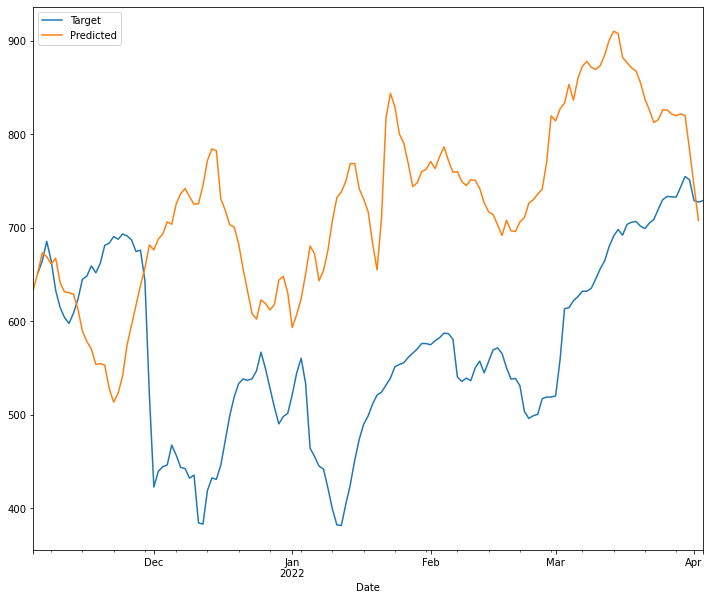

In [77]:
target_vs_predicted=pd.concat([target,predicted],axis=1)
target_vs_predicted.plot(legend=True,figsize=(12,10)) 
plt.savefig('sarimax_results.png')

## Much Better 

# Calculate RMSR 

In [101]:
eval=target_vs_predicted.dropna()

In [102]:
eval

,Target,Predicted
Date,,
2021-11-05,651.399306,651.855529
2021-11-06,664.416667,673.257528
2021-11-07,685.645833,669.121205
2021-11-08,664.812500,661.500784
2021-11-09,633.274306,667.533778
...,...,...
2022-03-29,743.548611,821.898938
2022-03-30,754.850694,820.152278
2022-03-31,751.381944,783.353650


In [103]:
from sklearn.metrics import mean_squared_error
#from math import r
#rmse=sqrt(mean_squared_error(predicted,test))
r2=r2_score(eval['Target'],eval['Predicted'])
print(r2)

mse=mean_squared_error(eval['Target'],eval['Predicted'])
print(mse)

-3.219128175186918
39243.494656544295


## Use the model to make feature predictions of Mean Conductivity for the upcoming 5 months 

In [81]:
index_future_dates=pd.date_range(start='2022-04-04',end='2022-09-04')
pred=model.predict(start=len(y),end=len(y)+153,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2022-04-04    680.644951
2022-04-05    695.755833
2022-04-06    705.238159
2022-04-07    697.416927
2022-04-08    681.421625
                 ...    
2022-08-31    802.745555
2022-09-01    821.326944
2022-09-02    807.181540
2022-09-03    830.383531
2022-09-04    842.780123
Freq: D, Name: ARIMA Predictions, Length: 154, dtype: float64


In [82]:
future_datest_df=pd.DataFrame({'Date':pred.index,'Prediction':pred.values})
future_datest_df=future_datest_df.set_index('Date')

In [83]:
future_df=pd.concat([y,future_datest_df])

In [84]:
future_df.head()

,Mean Conductivity,rolling_mean_diff,Prediction
Date,,,
2021-04-03,677.460000,NaN,NaN
2021-04-04,677.460000,NaN,NaN
2021-04-05,677.460000,NaN,NaN
2021-04-06,677.460000,NaN,NaN
2021-04-07,653.989583,NaN,NaN


## Display the predictions

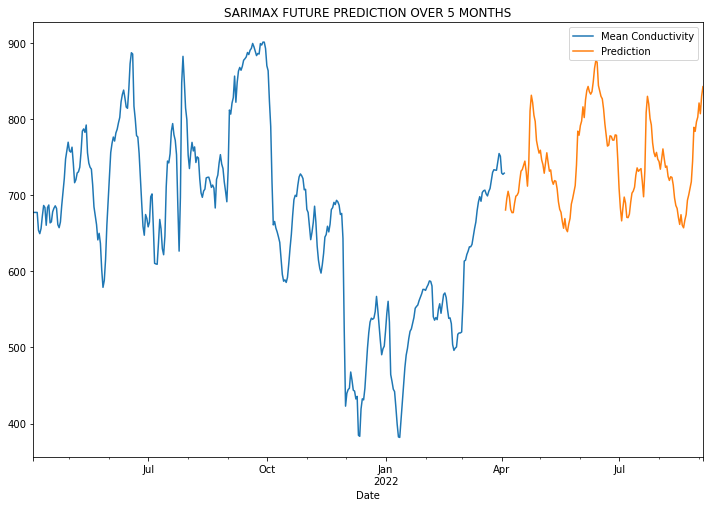

In [85]:

future_df[['Mean Conductivity', 'Prediction']].plot(figsize=(12, 8),title='SARIMAX FUTURE PREDICTION OVER 5 MONTHS') 
plt.savefig('sarimax_forecasting.png')